# Exploratory Statistics

Use of data over 4 years (2021 - 2024 inclusively), using only winter months (first 3 months) of each year.

### Prepare imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df_MLready = pd.read_parquet('df_MLready.parquet')

# print shape
print(df_MLready.shape)

# print columns
print(df_MLready.columns)

(34422038, 33)
Index(['OPERATION_DATE', 'TRIP_ID', 'OPERATOR_ID', 'OPERATOR_ABK',
       'OPERATOR_NAME', 'PRODUCT_ID', 'LINE_ID', 'LINE_TEXT', 'CIRCUIT_ID',
       'TRANSPORT_FORM', 'ADDITIONAL_TRIP', 'CANCELLATION', 'BPUIC',
       'STOP_NAME', 'TARGET_ARR', 'ACTUAL_ARR', 'ETA_STATUS', 'TARGET_DEP',
       'ACTUAL_DEP', 'ETD_STATUS', 'NO_STOP', 'OPERATION_DATE_dt', 'MONTH_YR',
       'ACTUAL_DEP_dt', 'ACTUAL_ARR_dt', 'PREV_STOP', 'PREV_DEP_dt', 'Delta',
       'Delta_seconds', 'Month', 'DayofWeek', 'Hour', 'Minute'],
      dtype='object')


MONTH_YR
2021-01    2764149
2021-02    2523986
2021-03    2768906
2022-01    2874898
2022-02    2615904
2022-03    2903675
2023-01    2981274
2023-02    2648969
2023-03    2883265
2024-01    3239034
2024-02    3032820
2024-03    3185158
Name: count, dtype: int64


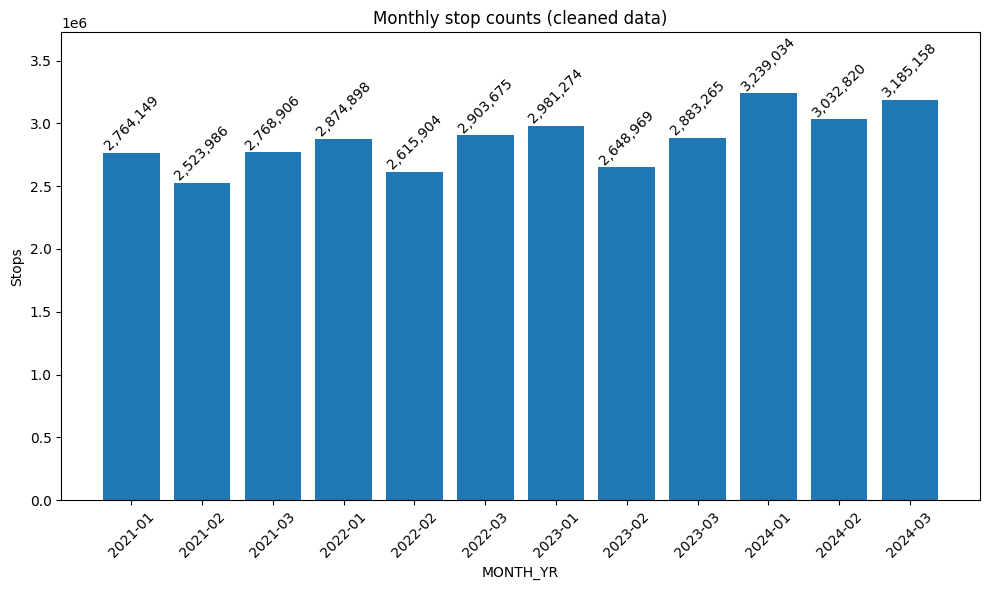

In [14]:
# cleaned number of stops by month
month_counts = df_MLready['MONTH_YR'].value_counts().sort_index()
print(month_counts)

plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index.astype(str), month_counts.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}', ha='center', va='bottom', rotation=45)


plt.title('Monthly stop counts (cleaned data)')
plt.xlabel('MONTH_YR')
plt.ylabel('Stops')
plt.ylim(0, month_counts.max() * 1.15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df_combined = pd.read_parquet('combined_df.parquet')
print(df_combined.shape)
print(df_combined.columns)

(56587864, 21)
Index(['OPERATION_DATE', 'TRIP_ID', 'OPERATOR_ID', 'OPERATOR_ABK',
       'OPERATOR_NAME', 'PRODUCT_ID', 'LINE_ID', 'LINE_TEXT', 'CIRCUIT_ID',
       'TRANSPORT_FORM', 'ADDITIONAL_TRIP', 'CANCELLATION', 'BPUIC',
       'STOP_NAME', 'TARGET_ARR', 'ACTUAL_ARR', 'ETA_STATUS', 'TARGET_DEP',
       'ACTUAL_DEP', 'ETD_STATUS', 'NO_STOP'],
      dtype='object')


In [ ]:
# fraction of winter months / complete data
print(len(df_MLready) / len(df_combined))
# 0.6082936440223295

print(len(df_MLready))
# 34,422,038

print(len(df_combined))
# 56,587,864

0.6082936440223295
34422038
56587864


### Unique number of stops


In [ ]:
unique_stops = pd.unique(df_combined[['STOP_NAME']].values.ravel())
num_unique_stops = len(unique_stops)
print("Number of unique stop names across both columns:", num_unique_stops)
# 1480 for MLready
# 1854 for combined_df

Number of unique stop names across both columns: 1854


### Number of unique Line IDs

In [ ]:
print(df_combined['LINE_ID'].nunique())
# 22,967

print(df_MLready['LINE_ID'].nunique())
# 19,488

22967
19488


### Table of Delta_seconds (length of time between stops)



In [ ]:
bins = [-np.inf, 0, 120, 3600, np.inf]
labels = ['<= 0', '0 to 120', '120 to 3600', '> 3600']

binned = pd.cut(df_MLready['Delta_seconds'], bins=bins, labels=labels)


# Count valid bins
counts = binned.value_counts().sort_index()

# Count NaT / missing values
counts['Na'] = df_MLready['Delta_seconds'].isna().sum()

print(counts)

# Table of Delta_seconds

bins = [-np.inf, 0, 120, 3600, np.inf]
labels = ['Delta <= 0', '0 to 120', '120 to 3600', '> 3600']

binned = pd.cut(df_MLready['Delta_seconds'], bins=bins, labels=labels)


# Count valid bins
counts = binned.value_counts().sort_index()

# Count NaT / missing values
counts['NaT'] = df_MLready['Delta_seconds'].isna().sum()

total = len(df_MLready)
result = counts.to_frame(name='Count')
result['Percentage'] = (result['Count'] / total * 100).round(3)
print(result)


'''
Delta_seconds                      
<= 0             174251       0.506
0 to 120       11306650      32.847
120 to 3600    22934245      66.627
> 3600             6892       0.020
NaT                   0       0.000
'''

Delta_seconds
<= 0             174251
0 to 120       11306650
120 to 3600    22934245
> 3600             6892
Na                    0
Name: count, dtype: int64
                  Count  Percentage
Delta_seconds                      
<= 0             174251       0.506
0 to 120       11306650      32.847
120 to 3600    22934245      66.627
> 3600             6892       0.020
NaT                   0       0.000


### Usable Deltas: between 2 and minutes and 1 hour

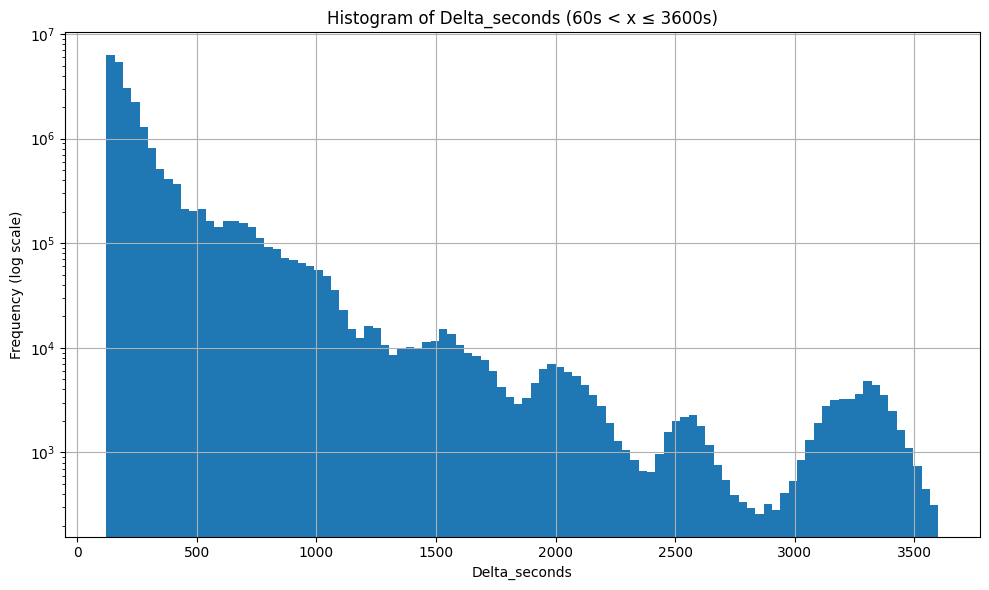

In [27]:
# Histogram of 120 < Delta_seconds <= 3600

delta_filtered = df_MLready['Delta_seconds'][
    (df_MLready['Delta_seconds'] > 120) & (df_MLready['Delta_seconds'] <= 3600)
]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(delta_filtered, bins=100)
plt.yscale('log')
plt.xlabel("Delta_seconds")
plt.ylabel("Frequency (log scale)")
plt.title("Histogram of Delta_seconds (60s < x ≤ 3600s)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Time differences

In [ ]:
''' # df_combined columns
Index(['OPERATION_DATE', 'TRIP_ID', 'OPERATOR_ID', 'OPERATOR_ABK',
       'OPERATOR_NAME', 'PRODUCT_ID', 'LINE_ID', 'LINE_TEXT', 'CIRCUIT_ID',
       'TRANSPORT_FORM', 'ADDITIONAL_TRIP', 'CANCELLATION', 'BPUIC',
       'STOP_NAME', 'TARGET_ARR', 'ACTUAL_ARR', 'ETA_STATUS', 'TARGET_DEP',
       'ACTUAL_DEP', 'ETD_STATUS', 'NO_STOP'],
'''

df_combined_dt = df_combined[["TARGET_ARR", "TARGET_DEP", "ACTUAL_ARR", "ACTUAL_DEP"]].copy()

# Put targets into datetime
df_combined_dt['TARGET_ARR_dt'] = pd.to_datetime(df_combined['TARGET_ARR'], errors='coerce')
df_combined_dt['TARGET_DEP_dt'] = pd.to_datetime(df_combined['TARGET_DEP'], errors='coerce')
df_combined_dt['ACTUAL_ARR_dt'] = pd.to_datetime(df_combined['ACTUAL_ARR'], errors='coerce')
df_combined_dt['ACTUAL_DEP_dt'] = pd.to_datetime(df_combined['ACTUAL_DEP'], errors='coerce')


# Calculate arrival and departure differences in seconds
df_combined_dt['ARR_diff'] = df_combined_dt['ACTUAL_ARR_dt'] - df_combined_dt['TARGET_ARR_dt']
df_combined_dt['DEP_diff'] = df_combined_dt['ACTUAL_DEP_dt'] - df_combined_dt['TARGET_DEP_dt']


# Avg, med between actual and target arrivals
arr_avg = df_combined_dt['ARR_diff'].mean()
arr_median = df_combined_dt['ARR_diff'].median()

# Avg, med between actual and target departures
dep_avg = df_combined_dt['DEP_diff'].mean()
dep_median = df_combined_dt['DEP_diff'].median()

'''
Arrival Time Difference (ACTUAL - TARGET):
  Average: 9390353.36 seconds
  Median:  12462885.00 seconds

Departure Time Difference (ACTUAL - TARGET):
  Average: 9389623.87 seconds
  Median:  12461596.50 seconds

Actual Station Time (DEP - ARR):
  Average: 66.85 seconds
  Median:  43.00 seconds

Target Station Time (DEP - ARR):
  Average: 835.32 seconds
  Median:  0.00 seconds
'''


Arrival Time Difference (ACTUAL - TARGET):
  Average: 9390353.36 seconds
  Median:  12462885.00 seconds

Departure Time Difference (ACTUAL - TARGET):
  Average: 9389623.87 seconds
  Median:  12461596.50 seconds

Actual Station Time (DEP - ARR):
  Average: 66.85 seconds
  Median:  43.00 seconds

Target Station Time (DEP - ARR):
  Average: 835.32 seconds
  Median:  0.00 seconds


### Stop counts

In [ ]:
# most and least stops counts
stop_counts = df_combined['STOP_NAME'].value_counts()

# Top 10 most common
top_10 = stop_counts.head(10)

# Bottom 10 least common
bottom_10 = stop_counts.tail(10)

# Combine them with a gap in between
combined_counts = pd.concat([
    top_10,
    pd.Series([None], index=['...gap...']),
    bottom_10
])

print(combined_counts)

'''
Zürich HB                     700712
Bern                          590888
Winterthur                    348581
Zürich Oerlikon               327270
Olten                         299365
Luzern                        294761
Basel SBB                     272207
Zürich Hardbrücke             256309
Zürich Stadelhofen            253544
Aarau                         240753
...gap...                       None
Spiezmoos Süd                      1
Wengi                              1
Hondrich Süd                       1
Founex                             1
Brunnenfluh                        1
Stablini                           1
Chêne-Bourg-Frontière              1
Neuberg                            1
Steckborn Ausweiche (Dsta)         1
Krattighalde                       1
'''

Zürich HB                     700712
Bern                          590888
Winterthur                    348581
Zürich Oerlikon               327270
Olten                         299365
Luzern                        294761
Basel SBB                     272207
Zürich Hardbrücke             256309
Zürich Stadelhofen            253544
Aarau                         240753
...gap...                       None
Spiezmoos Süd                      1
Wengi                              1
Hondrich Süd                       1
Founex                             1
Brunnenfluh                        1
Stablini                           1
Chêne-Bourg-Frontière              1
Neuberg                            1
Steckborn Ausweiche (Dsta)         1
Krattighalde                       1
dtype: object


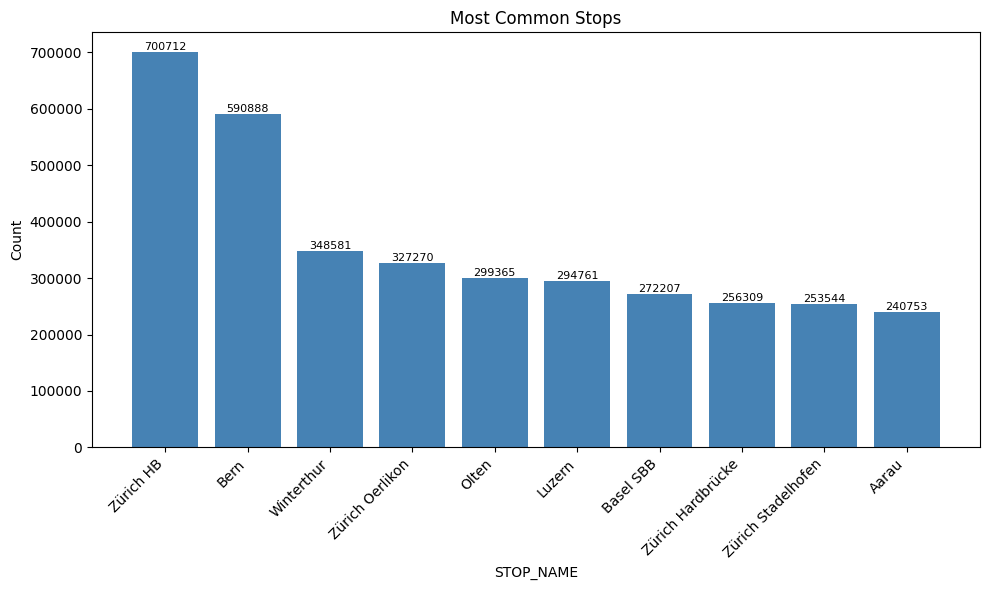

In [33]:
# see above

data = pd.Series({
    'Zürich HB':                     700712,
    'Bern':                          590888,
    'Winterthur':                    348581,
    'Zürich Oerlikon':               327270,
    'Olten':                         299365,
    'Luzern':                        294761,
    'Basel SBB':                     272207,
    'Zürich Hardbrücke':             256309,
    'Zürich Stadelhofen':            253544,
    'Aarau':                         240753
})

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data.values, color='steelblue')
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Stops")
plt.xlabel("STOP_NAME")
plt.ylabel("Count")

# Annotate each bar with its value
for bar, count in zip(bars, data.values):
    if pd.notna(count):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{int(count)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()